# A comparative genomic analysis of Pseudomonas aeruginosa strains isolated from oil-contaminates environments in Peru (Script Report)

### Notebook by: reymonera (Camila Castillo-Vilcahuaman)

This is a notebook that hosts the logic behind the bioinformatics workflow used during the "A comparative genomic analysis of Pseudomonas aeruginosa strains isolated from oil-contaminated environments in Peru". The aim of this notebook is to make our code more reproducible. It should be noted that this notebook begins after the assembly of the genomes used in this paper.

First, here's a test on how bash scripting is working in this environment.

In [1]:
%%sh
ls

LICENSE
Pseudomonas_notebook.ipynb
README.md
accession_list.txt
ncbi_dataset.zip
pseudomonas-environment.yaml


Now, we will require to have a kernel with the environment built for this notebook. For this, we will execute the following commands in the terminal:
```
conda env create -f pseudomonas-notebook.yaml
python -m ipykernel install --user --name=pseudomonas_notebook
jupyter-notebook
```
Please, make sure that you select or change the default kernel with the `pseudomonas_notebook` one.

Now, here we will activate all environments used on this project. All environments were managed using `conda` and I normally manage each program in its own environment. If you use any of these environments in other ways, then you should change the code here.

In [2]:
# Check if path to packages is here, if not, configure it in this cell
import sys
print(sys.executable)
sys.path.append('/home/marlen/miniforge3/lib/python3.10/site-packages') #('path/to/site/packages')
import sys

/home/marlen/miniforge3/envs/pseudomonas-environment/bin/python


In [3]:
import os
os.environ['R_HOME'] = '/home/marlen/miniforge3/envs/pseudomonas-environment/lib/R'

In [4]:
#Load the rpy2 feature so that you can execute R code during this notebook.
%load_ext rpy2.ipython

In [5]:
!datasets download genome accession --inputfile accession_list.txt

Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: ncbi_dataset.zip    847B 19.4MB/s
Downloading: 

## ANI

ANI was executed using `PyAni`, activated through `conda`. A directory was created using the available genomes in public repositories plus the strain sequenced for this study. This directory was used as a database.

In [6]:
!pip install biopython

!datasets download genome accession --inputfile accession_list.txt
!unzip -j ncbi_dataset.zip "ncbi_dataset/data/*/*.fna" -d db_pseudomonas

Downloading: ncbi_dataset.zip    6.22kB 85.4MB/s
Downloading: ncbi_dataset.zip    6.22kB 85.4MB/s
Downloading: ncbi_dataset.zip    6.22kB 85.4MB/s
Downloading: ncbi_dataset.zip    6.22kB 85.4MB/s
Downloading: ncbi_dataset.zip    6.34kB 164kB/s
Downloading: ncbi_dataset.zip    6.34kB 164kB/s
Downloading: ncbi_dataset.zip    6.34kB 164kB/s
Downloading: ncbi_dataset.zip    6.34kB 164kB/s
Downloading: ncbi_dataset.zip    6.34kB 164kB/s
Downloading: ncbi_dataset.zip    6.34kB 164kB/s
Downloading: ncbi_dataset.zip    6.34kB 164kB/s
Downloading: ncbi_dataset.zip    6.34kB 164kB/s
Downloading: ncbi_dataset.zip    6.34kB 164kB/s
Downloading: ncbi_dataset.zip    32.8kB 255kB/s
Downloading: ncbi_dataset.zip    32.8kB 255kB/s
Downloading: ncbi_dataset.zip    32.8kB 255kB/s
Downloading: ncbi_dataset.zip    32.8kB 255kB/s
Downloading: ncbi_dataset.zip    32.8kB 255kB/s
Downloading: ncbi_dataset.zip    32.8kB 255kB/s
Downloading: ncbi_dataset.zip    32.8kB 255kB/s
Downloading: ncbi_dataset.zip    32.

In [7]:
!average_nucleotide_identity.py -i db_pseudomonas -o ANIm_output -m ANIm -g
!average_nucleotide_identity.py -i db_pseudomonas -o ANIb_output -m ANIb -g

After this, using the `pheatmap` library in R is a requirement to get the heatmap that was used in this paper.

In [8]:
%%R
getwd()

[1] "/home/marlen/gitrepos/pseudomonas_notebook"


--- Please select a CRAN mirror for use in this session ---


* installing *source* package ‘colorspace’ ...
** package ‘colorspace’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (Anaconda gcc) 11.2.0’


x86_64-conda-linux-gnu-cc -I"/home/marlen/miniforge3/envs/pseudomonas-environment/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/marlen/miniforge3/envs/pseudomonas-environment/include -I/home/marlen/miniforge3/envs/pseudomonas-environment/include -Wl,-rpath-link,/home/marlen/miniforge3/envs/pseudomonas-environment/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/marlen/miniforge3/envs/pseudomonas-environment/include -fdebug-prefix-map=/workspace/croot/r-base_1695428141831/work=/usr/local/src/conda/r-base-4.3.1 -fdebug-prefix-map=/home/marlen/miniforge3/envs/pseudomonas-environment=/usr/local/src/conda-prefix  -c colorspace.c -o colorspace.o
x86_64-conda-linux-gnu-cc -I"/home/marlen/miniforge3/envs/pseudomonas-environment/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/marlen/miniforge3/envs/pseudomonas-environment/include -I/home/marlen/mi

installing to /home/marlen/miniforge3/envs/pseudomonas-environment/lib/R/library/00LOCK-colorspace/00new/colorspace/libs
** R
** data
*** moving datasets to lazyload DB
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (colorspace)
* installing *source* package ‘farver’ ...
** package ‘farver’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C++ compiler: ‘x86_64-conda-linux-gnu-c++ (Anaconda gcc) 11.2.0’


x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/home/marlen/miniforge3/envs/pseudomonas-environment/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/marlen/miniforge3/envs/pseudomonas-environment/include -I/home/marlen/miniforge3/envs/pseudomonas-environment/include -Wl,-rpath-link,/home/marlen/miniforge3/envs/pseudomonas-environment/lib    -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/marlen/miniforge3/envs/pseudomonas-environment/include -fdebug-prefix-map=/workspace/croot/r-base_1695428141831/work=/usr/local/src/conda/r-base-4.3.1 -fdebug-prefix-map=/home/marlen/miniforge3/envs/pseudomonas-environment=/usr/local/src/conda-prefix  -c ColorSpace.cpp -o ColorSpace.o
x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/home/marlen/miniforge3/envs/pseudomonas-environment/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem 

installing to /home/marlen/miniforge3/envs/pseudomonas-environment/lib/R/library/00LOCK-farver/00new/farver/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (farver)
* installing *source* package ‘labeling’ ...
** package ‘labeling’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of t

also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘viridisLite’, ‘RColorBrewer’, ‘scales’, ‘gtable’

trying URL 'https://cran.dcc.uchile.cl/src/contrib/colorspace_2.1-1.tar.gz'
Content type 'application/octet-stream' length 2141289 bytes (2.0 MB)
downloaded 2.0 MB

trying URL 'https://cran.dcc.uchile.cl/src/contrib/farver_2.1.2.tar.gz'
Content type 'application/octet-stream' length 1275981 bytes (1.2 MB)
downloaded 1.2 MB

trying URL 'https://cran.dcc.uchile.cl/src/contrib/labeling_0.4.3.tar.gz'
Content type 'application/octet-stream' length 10167 bytes
downloaded 10167 bytes

trying URL 'https://cran.dcc.uchile.cl/src/contrib/munsell_0.5.1.tar.gz'
Content type 'application/octet-stream' length 182310 bytes (178 KB)
downloaded 178 KB

trying URL 'https://cran.dcc.uchile.cl/src/contrib/viridisLite_0.4.2.tar.gz'
Content type 'application/octet-stream' length 1267121 bytes (1.2 MB)
downloaded 1.2 MB

trying URL 'https://cran.dcc.uchile.cl/src/contrib/RColorBr

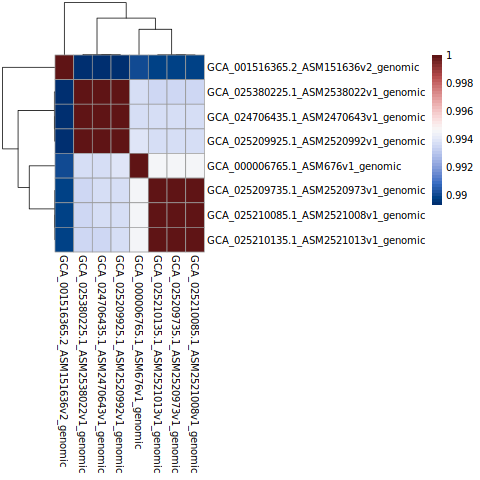

In [9]:
%%R
#We execute the library
library(pheatmap)

#The matrix is imported from the previous ANI analysis
matrix_ani <- read.csv('ANIm_output/ANIm_percentage_identity.tab', row.names=1, sep="\t")

#phetmap produces the matrix
#pheatmap(matrix_ani)
pheatmap(matrix_ani, color = hcl.colors(50, "Blue-Red 3"))

For the pangenomic analysis, we used BAKTA and Panaroo. Panaroo was executed with the following commands:

In [ ]:
#conda activate bakta
#for k in *.fna; do bakta $k --output "$k".bakta.output/ --prefix BAKTA_$k; done

# Create a directory called panaroo

#find /home/lgm/Documents/bb_ccastillo -name '*.gff3' -exec cp -t /home/lgm/Documents/bb_ccastillo_2/panaroo {} +

#cd panaroo
#conda activate panaroo
#panaroo -i *.gff3 -o ./results/ --clean-mode strict -a core -t 6

However, since we will not reproduce this exactly, we will import the pangenome. We will import the big one, for reproducibility purposes, and also the smaller one, that was used to plot the pangenome in a friendlier way, available for publication:

Panaroo then was processed using an in-house script to create an UpSet plot. However, since the original is so large, we used a smaller pangenome:

With this output, we used the core-gene alignment provided by Panaroo to generate the phylogeny for our tree. For this, we used RAxML, as featured here:

The final tree was edited using iTOL, but here we provide a fast visualization for reproducibility purposes:

To generate our gene synteny blocks, we used R packages like gggenomes. We used ´tblastx´ as featured in the NCBI page. We compared contig by contig, finally obtaining the desired alineations. They are applied as follows: